In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import boto3
import scipy.stats as stats
plt.style.use('seaborn-darkgrid')

In [2]:
s3 = boto3.client('s3')
obj = s3.get_object(Bucket='capstone1largedata', Key='US_Accidents_Dec19.csv')
data = pd.read_csv(obj['Body'])

/home/david/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
data['Weather_Condition'].fillna('', inplace=True)

In [6]:
corr_df = data[['ID', 'Severity', 'City', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset']].copy()

In [7]:
night_dct = {'Night':True, 'Day':False}

In [8]:
corr_df['Night'] = corr_df['Sunrise_Sunset'].map(night_dct)

In [9]:
corr_df.drop(columns='Sunrise_Sunset', inplace=True)

In [10]:
corr_df['Traffic_Calming'].fillna(False, inplace=True)
corr_df['Traffic_Signal'].fillna(False, inplace=True)
corr_df['Roundabout'].fillna(False, inplace=True)
corr_df['Railway'].fillna(False, inplace=True)
corr_df['No_Exit'].fillna(False, inplace=True)
corr_df['Junction'].fillna(False, inplace=True)
corr_df['Give_Way'].fillna(False, inplace=True)
corr_df['Crossing'].fillna(False, inplace=True)
corr_df['Bump'].fillna(False, inplace=True)
corr_df['Stop'].fillna(False, inplace=True)
corr_df['Night'].fillna(False, inplace=True)

In [11]:
corr_df.corr()

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Night
Severity,1.000000,-0.015752,-0.059511,-0.003436,0.012262,-0.013923,0.028444,0.021533,-0.006279,-0.174763,-0.015507,0.125819,-0.011141,-0.031160,-0.005876,-0.080949,-0.010094,-0.266481,0.043515
Temperature(F),-0.015752,1.000000,0.995083,-0.305244,-0.110716,0.168169,-0.035649,-0.016585,-0.000023,0.023073,-0.001685,-0.017278,0.001913,0.006069,-0.001674,0.000005,-0.001853,0.048939,-0.260259
Wind_Chill(F),-0.059511,0.995083,1.000000,-0.260084,-0.273309,0.181388,-0.194123,-0.035639,0.002875,0.030836,0.001034,-0.019287,0.005023,0.014448,-0.001786,0.008726,0.001998,0.045088,-0.238600
Humidity(%),-0.003436,-0.305244,-0.260084,1.000000,0.075943,-0.386459,-0.140454,0.061965,-0.002707,-0.039119,0.002997,-0.001285,-0.010259,-0.002644,0.001806,-0.015517,-0.000366,-0.027001,0.218477
Pressure(in),0.012262,-0.110716,-0.273309,0.075943,1.000000,-0.020026,0.014046,0.039996,-0.008159,-0.029069,-0.000185,0.022101,-0.011173,0.007992,0.001771,-0.013553,-0.002549,-0.013195,0.028553
Visibility(mi),-0.013923,0.168169,0.181388,-0.386459,-0.020026,1.000000,0.007228,-0.088249,0.005182,0.035675,0.003741,-0.003537,0.013299,0.003244,-0.000116,0.006711,0.003534,0.028486,-0.031671
Wind_Speed(mph),0.028444,-0.035649,-0.194123,-0.140454,0.014046,0.007228,1.000000,0.026229,0.000676,0.007511,-0.001840,0.003154,0.000162,-0.005183,-0.000960,0.006609,-0.002532,0.013570,-0.106837
Precipitation(in),0.021533,-0.016585,-0.035639,0.061965,0.039996,-0.088249,0.026229,1.000000,-0.000927,0.000682,-0.001679,0.005773,-0.001594,0.002123,-0.000198,-0.001087,-0.001120,0.005732,0.004196
Bump,-0.006279,-0.000023,0.002875,-0.002707,-0.008159,0.005182,0.000676,-0.000927,1.000000,0.010106,-0.000712,-0.002899,0.026832,-0.000901,-0.000112,0.017446,0.642716,-0.004551,-0.000463
Crossing,-0.174763,0.023073,0.030836,-0.039119,-0.029069,0.035675,0.007511,0.000682,0.010106,1.000000,0.071055,-0.064090,0.057268,0.239872,-0.001102,0.074959,0.023034,0.425901,-0.027697


In [12]:
corr_df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', '',
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow', 

In [36]:
snow = corr_df[corr_df['Weather_Condition'].str.contains('snow', case=False)].copy()
rain = corr_df[corr_df['Weather_Condition'].str.contains('rain', case=False)].copy()
fog = corr_df[corr_df['Weather_Condition'].str.contains('fog', case=False)].copy()
wind = corr_df[corr_df['Weather_Condition'].str.contains('wind', case=False)].copy()
smoke = corr_df[corr_df['Weather_Condition'].str.contains('smoke', case=False)].copy()
dust = corr_df[corr_df['Weather_Condition'].str.contains('dust', case=False)].copy()
freezing = corr_df[corr_df['Weather_Condition'].str.contains('freezing', case=False)].copy()
clear = corr_df[corr_df['Weather_Condition'].str.contains('clear', case=False)].copy()
cloud = corr_df[corr_df['Weather_Condition'].str.contains('cloud', case=False)].copy()

In [37]:
conditions = [snow, rain, fog, wind, smoke, dust, freezing, clear, cloud]
means = [condition['Severity'].values.mean() for condition in conditions]
conditions = ['snow', 'rain', 'fog', 'wind', 'smoke', 'dust', 'freezing', 'clear', 'cloud']

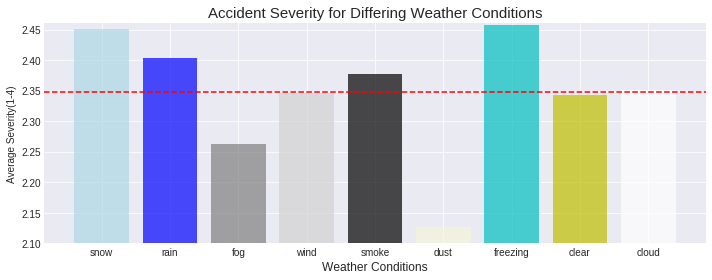

In [113]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(conditions, means, color=['lightblue', 'b', 'gray', 'lightgray','k','beige','c','y','w'], alpha=.7)
ax.set_ylim(2.1,2.46)
ax.axhline(np.mean(data['Severity']), linestyle='--', color='r')
ax.set_xlabel('Weather Conditions', size=12)
ax.set_ylabel('Average Severity(1-4)')
ax.set_title('Accident Severity for Differing Weather Conditions', size=15)
plt.savefig('../images/sev_cond.png')
plt.tight_layout()

In [16]:
data['State'].fillna('unk', inplace=True)

In [17]:
state_list = list(data['State'].unique())
state_list.pop()

'unk'

In [18]:
fog_counts = [data[data['State']==state][data[data['State']==state]['Weather_Condition'].str.contains('fog', case=False)]['ID'].count() for state in state_list]

In [19]:
cars_per_state = {'state': ['California', 'Texas', 'Florida', 'New York', 'Ohio', 'Illinois', 'Pennsylvania', 'Georgia', 'North Carolina', 'Virginia', 'Michigan', 'Washington', 'New Jersey', 'Arizona', 'Tennessee', 'Indiana', 'Massachusetts', 'Alabama', 'Missouri', 'Wisconsin', 'Minnesota', 'Maryland', 'South Carolina', 'Colorado', 'Kentucky', 'Oregon', 'Louisiana', 'Connecticut', 'Oklahoma', 'Iowa', 'Nevada', 'Kansas', 'Utah', 'Arkansas', 'Mississippi', 'Nebraska', 'New Mexico', 'Idaho', 'West Virginia', 'Hawaii', 'New Hampshire', 'Montana', 'Delaware', 'Rhode Island', 'Maine', 'South Dakota', 'North Dakota', 'Vermont', 'District of Columbia', 'Wyoming', 'Alaska'],'cars':[15065827,8248322,7966091,4712779,4603594,4477763,4424183,3557469,3393781,3267735,3023940,2964939,2754253,2391772,2285329,2248870,2182530,2161212,2102216,2087518,1976525,1922463,1830186,1798177,1721942,1488623,1389249,1306709,1296219,1242219,1073760,975171,937421,921161,825338,683020,655766,598774,560118,509492,506959,452845,433363,412255,390506,358859,240048,218302,209723,203546,183270]}
state_full = {'AL':'Alabama', 'AR':'Arkansas', 'AZ':'Arizona', 'CA':'California', 'CO':'Colorado', 'CT':'Connecticut', 'DC':'District of Columbia', 'DE':'Delaware','FL':'Florida', 'GA':'Georgia', 'IA':'Iowa', 'ID':'Idaho', 'IL':'Illinois', 'IN':'Indiana', 'KS':'Kansas', 'KY':'Kentucky', 'LA':'Louisiana', 'MA':'Massachusetts', 'MD':'Maryland', 'ME':'Maine', 'MI':'Michigan', 'MN':'Minnesota', 'MO':'Missouri', 'MS':'Mississippi', 'MT':'Montana', 'NC':'North Carolina', 'ND':'North Dakota', 'NE': 'Nebraska', 'NH':'New Hampshire', 'NJ':'New Jersey', 'NM':'New Mexico', 'NV': 'Nevada', 'NY':'New York', 'OH':'Ohio', 'OK':'Oklahoma', 'OR':'Oregon', 'PA':'Pennsylvania', 'RI':'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN':'Tennessee', 'TX':'Texas', 'UT': 'Utah', 'VA':'Virginia', 'VT':'Vermont', 'WA':'Washington', 'WI':'Wisconsin', 'WV':'West Virginia', 'WY':'Wyoming'}
cars_per_state = pd.DataFrame(cars_per_state)
states = {state: abbrev for abbrev, state in state_full.items()}
cars_per_state['state'] = cars_per_state['state'].map(states)

In [20]:
fog_df = pd.DataFrame({'state': state_list, 'accidents': fog_counts})

In [21]:
fog_df = fog_df.set_index('state').join(cars_per_state.set_index('state'))
fog_df.reset_index(inplace=True)

In [22]:
fog_df['accident_rate'] = fog_df['accidents'] / fog_df['cars']

In [23]:
fog_df.head()

,state,accidents,cars,accident_rate
0,AL,208,2161212,0.000096
1,AR,10,921161,0.000011
2,AZ,17,2391772,0.000007
3,CA,2689,15065827,0.000178
4,CO,273,1798177,0.000152


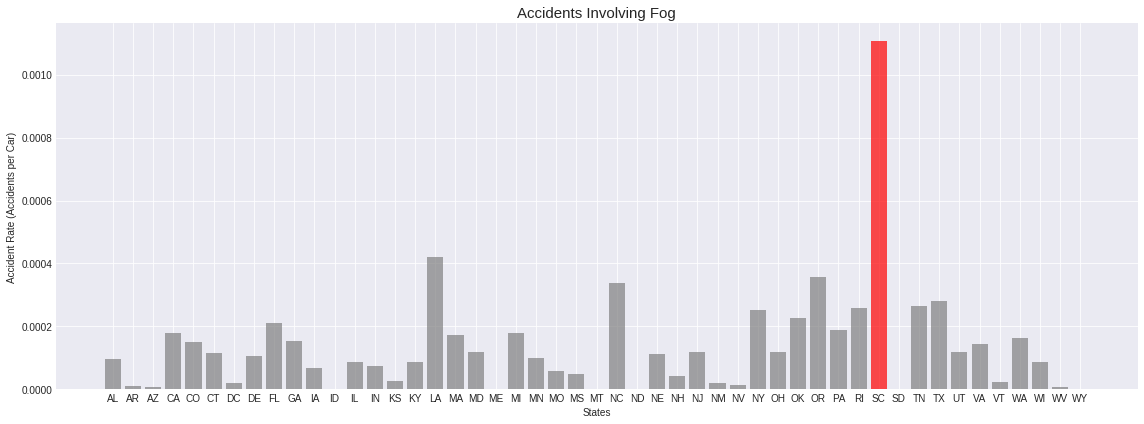

In [24]:
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(fog_df['state'].values, fog_df['accident_rate'].values, color=['red' if (x=='SC') else 'grey' for x in fog_df['state'].values], alpha=.7)
ax.set_xlabel('States')
ax.set_ylabel('Accident Rate (Accidents per Car)')
ax.set_title('Accidents Involving Fog', size=15)
plt.savefig('../images/fog_accident_rate.png')
plt.tight_layout()

In [25]:
Traffic_Calming = corr_df[corr_df['Traffic_Calming']==True]
Traffic_Signal = corr_df[corr_df['Traffic_Signal']==True]
Roundabout = corr_df[corr_df['Roundabout']==True]
Railway = corr_df[corr_df['Railway']==True]
No_Exit = corr_df[corr_df['No_Exit']==True]
Junction = corr_df[corr_df['Junction']==True]
Give_Way = corr_df[corr_df['Give_Way']==True]
Crossing = corr_df[corr_df['Crossing']==True]
Bump = corr_df[corr_df['Bump']==True]
Stop = corr_df[corr_df['Stop']==True]

In [26]:
traffic = [Traffic_Calming, Traffic_Signal, Roundabout, Railway, No_Exit, Junction, Give_Way, Crossing, Bump, Stop]
t_means = [t['Severity'].values.mean() for t in traffic]
traffic = ['Traffic_Calming', 'Traffic_Signal', 'Roundabout', 'Railway', 'No_Exit', 'Junction', 'Give_Way', 'Crossing', 'Bump', 'Stop']

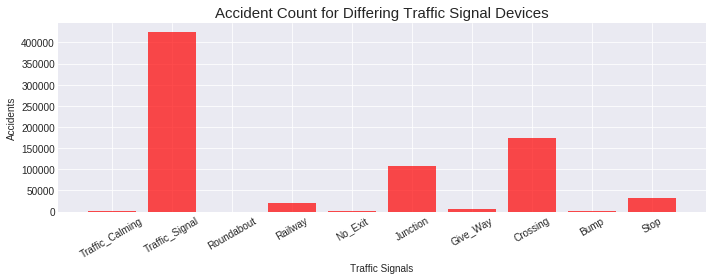

In [62]:
traffic_counts = [corr_df['ID'][corr_df[t]==True].count() for t in traffic]
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(traffic, traffic_counts, color='r', alpha=.7)
plt.xticks(rotation=30)
ax.set_xlabel('Traffic Signals')
ax.set_ylabel('Accidents')
ax.set_title('Accident Count for Differing Traffic Signal Devices', size=15)
plt.savefig('../images/traffic_counts.png')
plt.tight_layout()

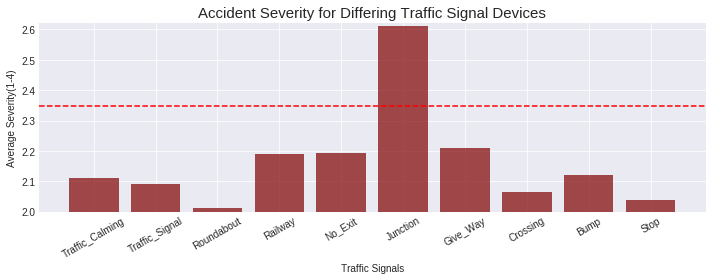

In [114]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(traffic, t_means, color='maroon', alpha=.7)
ax.set_ylim(2,2.62)
plt.xticks(rotation=30)
ax.axhline(np.mean(data['Severity']), linestyle='--', color='r')
ax.set_xlabel('Traffic Signals')
ax.set_ylabel('Average Severity(1-4)')
ax.set_title('Accident Severity for Differing Traffic Signal Devices', size=15)
plt.savefig('../images/sev_traffic.png')
plt.tight_layout()

In [29]:
Night = corr_df[corr_df['Night']==True]
Day = corr_df[corr_df['Night']==False]

In [30]:
times = [Night, Day]
times_means = [time['Severity'].values.mean() for time in times]
times = ['Night', 'Day']

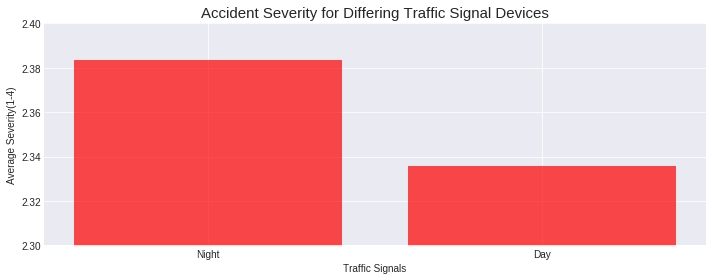

In [31]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(times, times_means, color='r', alpha=.7)
ax.set_ylim(2.3,2.4)
ax.set_xlabel('Traffic Signals')
ax.set_ylabel('Average Severity(1-4)')
ax.set_title('Accident Severity for Differing Traffic Signal Devices', size=15)
plt.savefig('../images/sev_traffic.png')
plt.tight_layout()

In [98]:
def ttest_conditions(conditions):
    for condition in conditions:
        sample = corr_df['Severity'][corr_df['Weather_Condition'].str.contains(condition, case=False)].values
        population = data['Severity'].values
        t,p = stats.ttest_ind(sample, population)
        print(f"{condition} p-value:{p:.3f} t-value:{t:.3f}")

In [99]:
ttest_conditions(conditions)

snow p-value:0.000 t-value:38.782
rain p-value:0.000 t-value:42.230
fog p-value:0.000 t-value:-25.022
wind p-value:0.825 t-value:-0.222
smoke p-value:0.005 t-value:2.794
dust p-value:0.000 t-value:-6.026
freezing p-value:0.000 t-value:11.677
clear p-value:0.000 t-value:-8.157
cloud p-value:0.000 t-value:4.163


In [107]:
def ttest_traffic(traffic):
    for traff in traffic:
        sample = corr_df['Severity'][corr_df[traff]==True].values
        population = data['Severity'].values
        t,p = stats.ttest_ind(sample, population)
        print(f"{traff} p-value:{p:.3f} t-value:{t:.3f}")

In [108]:
ttest_traffic(traffic)

Traffic_Calming p-value:0.000 t-value:-14.763
Traffic_Signal p-value:0.000 t-value:-337.392
Roundabout p-value:0.000 t-value:-8.596
Railway p-value:0.000 t-value:-45.239
No_Exit p-value:0.000 t-value:-16.281
Junction p-value:0.000 t-value:174.778
Give_Way p-value:0.000 t-value:-22.630
Crossing p-value:0.000 t-value:-242.410
Bump p-value:0.000 t-value:-9.184
Stop p-value:0.000 t-value:-117.353


In [66]:
most_severe = corr_df[(corr_df['Weather_Condition'].str.contains('freezing', case=False)) & (corr_df['Junction']==True) & (corr_df['Night']==True)]
np.mean(most_severe['Severity'])

2.8

In [70]:
least_severe = corr_df[(corr_df['Weather_Condition'].str.contains('fog', case=False)) & (corr_df['Roundabout']==True) & (corr_df['Night']==False)]
np.mean(least_severe['Severity'])

2.0

In [122]:
most_severe= corr_df[corr_df['Severity']==4]
for condition in conditions:
    count = most_severe['Severity'][most_severe['Weather_Condition'].str.contains(condition, case=False)].count()
    print(f'{condition}:{count}')

snow:105
rain:391
fog:45
wind:54
smoke:1
dust:0
freezing:4
clear:436
cloud:1771


In [123]:
least_severe= corr_df[corr_df['Severity']==1]
for condition in conditions:
    count = least_severe['Severity'][least_severe['Weather_Condition'].str.contains(condition, case=False)].count()
    print(f'{condition}:{count}')

snow:11
rain:56
fog:7
wind:0
smoke:1
dust:0
freezing:1
clear:324
cloud:303


In [125]:
for traff in traffic:
    count = most_severe['Severity'][most_severe[traff]==True].count()
    print(f'{traff}:{count}')

Traffic_Calming:0
Traffic_Signal:169
Roundabout:0
Railway:12
No_Exit:0
Junction:279
Give_Way:15
Crossing:41
Bump:0
Stop:6


In [126]:
for traff in traffic:
    count = least_severe['Severity'][least_severe[traff]==True].count()
    print(f'{traff}:{count}')

Traffic_Calming:0
Traffic_Signal:152
Roundabout:0
Railway:6
No_Exit:3
Junction:13
Give_Way:1
Crossing:81
Bump:0
Stop:28


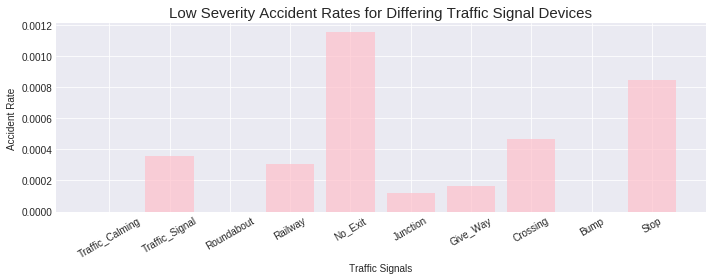

In [157]:
traffic_rates = [least_severe['Severity'][least_severe[t]==True].count()/corr_df['Severity'][corr_df[t]==True].count() for t in traffic]
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(traffic, traffic_rates, color='pink', alpha=.7)
plt.xticks(rotation=30)
ax.set_xlabel('Traffic Signals')
ax.set_ylabel('Accident Rate')
ax.set_title('Low Severity Accident Rates for Differing Traffic Signal Devices', size=15)
plt.savefig('../images/traffic_low.png')
plt.tight_layout()

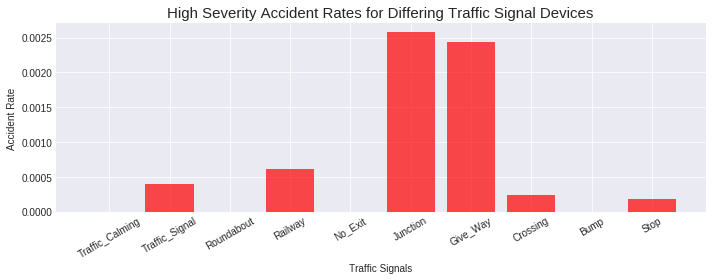

In [155]:
traffic_rates = [most_severe['Severity'][most_severe[t]==True].count()/corr_df['Severity'][corr_df[t]==True].count() for t in traffic]
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(traffic, traffic_rates, color='r', alpha=.7)
plt.xticks(rotation=30)
ax.set_xlabel('Traffic Signals')
ax.set_ylabel('Accident Rate')
ax.set_title('High Severity Accident Rates for Differing Traffic Signal Devices', size=15)
plt.savefig('../images/traffic_high.png')
plt.tight_layout()

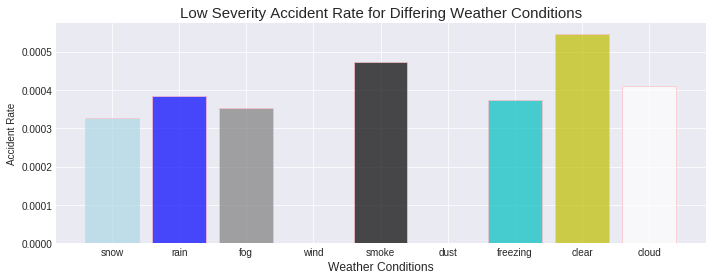

In [158]:
weather_rates = [least_severe['Severity'][least_severe['Weather_Condition'].str.contains(condition, case=False)].count()/corr_df['Severity'][corr_df['Weather_Condition'].str.contains(condition, case=False)].count() for condition in conditions]
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(conditions, weather_rates, color=['lightblue', 'b', 'gray', 'lightgray','k','beige','c','y','w'], alpha=.7, edgecolor='pink')
ax.set_xlabel('Weather Conditions', size=12)
ax.set_ylabel('Accident Rate')
ax.set_title('Low Severity Accident Rate for Differing Weather Conditions', size=15)
plt.savefig('../images/cond_low.png')
plt.tight_layout()

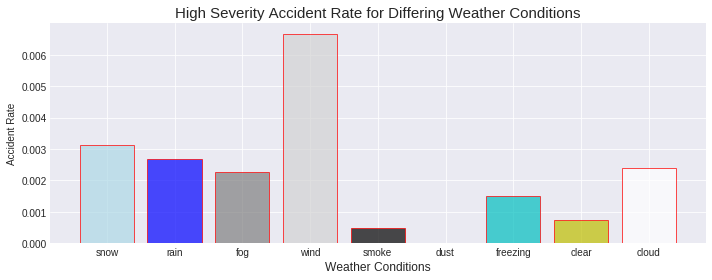

In [159]:
weather_rates = [most_severe['Severity'][most_severe['Weather_Condition'].str.contains(condition, case=False)].count()/corr_df['Severity'][corr_df['Weather_Condition'].str.contains(condition, case=False)].count() for condition in conditions]
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(conditions, weather_rates, color=['lightblue', 'b', 'gray', 'lightgray','k','beige','c','y','w'], alpha=.7, edgecolor='r')
ax.set_xlabel('Weather Conditions', size=12)
ax.set_ylabel('Accident Rate')
ax.set_title('High Severity Accident Rate for Differing Weather Conditions', size=15)
plt.savefig('../images/cond_high.png')
plt.tight_layout()